# Load Packages

In [1]:
using DifferentialEquations
using OrdinaryDiffEq
using DiffEqBase
using Sundials
using ODEInterfaceDiffEq
using Plots
using Measures
using CSV
using DataFrames
# using Turing
# using MCMCChains
using EasyFit
using StatsPlots
using LinearAlgebra
using Random
using Distributions
using OrdinaryDiffEq
using LsqFit
using BlackBoxOptim
using LaTeXStrings
using KernelDensity
using Polynomials 
using HypothesisTests

# Cell Counter Viability

In [2]:
dat = CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\PyrBuffer_ViabilityAssayCellCount\\Cell_vs_pyr_con.csv", DataFrame)

Row,Label,[Pyr],Pyr,Media,Via. Rep 1 Cam1,Num Cells (M/mL),Via. Rep 1 Cam2,Num Cells (M/mL)_1,Via. Rep 2 Cam 1,Num Cells (M/mL)_2,Via. Rep 2 Cam2,Num Cells (M/mL)_3,Via. Rep 3 Cam1,Num Cells (M/mL)_4,Via. Rep 3 Cam2,Num Cells (M/mL)_5
,Int64,Float64,Int64,Int64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64
1,0,0.0,0,100,97,15.9,97,11.9,98,17.6,97,13.6,96,16.4,96,19.1
2,1,0.792,1,100,98,9.06,98,7.09,98,9.96,98,9.2,96,8.16,97,10.5
3,2,1.584,2,99,96,6.92,98,8.53,97,8.0,97,7.3,98,6.91,98,7.92
4,3,3.137,4,98,95,7.74,96,8.05,98,8.85,98,7.64,98,8.01,98,8.32
5,4,6.154,8,96,96,9.39,97,9.58,96,9.58,95,9.42,98,9.26,97,9.07
6,5,11.852,16,92,96,6.7,95,4.37,86,12.9,95,8.81,96,10.5,97,8.17
7,6,22.07,32,84,97,7.87,96,6.78,94,6.74,92,5.97,93,7.81,97,7.89
8,7,33.9,50,68,97,9.01,98,6.98,97,6.35,97,7.19,97,7.1,98,8.66
9,8,40.0,50,50,97,6.67,97,5.81,94,8.16,96,7.56,96,6.47,96,7.72


In [3]:
pyr = dat[!,"[Pyr]"];

rep1 = hcat(dat[!,"Via. Rep 1 Cam1"],dat[!,"Via. Rep 1 Cam2"]);
rep2 = hcat(dat[!,"Via. Rep 2 Cam 1"],dat[!,"Via. Rep 2 Cam2"]);
rep3 = hcat(dat[!,"Via. Rep 3 Cam1"],dat[!,"Via. Rep 3 Cam2"]);

In [4]:
allDat = hcat(rep1,rep2,rep3)

9×6 Matrix{Int64}:
 97  97  98  97  96  96
 98  98  98  98  96  97
 96  98  97  97  98  98
 95  96  98  98  98  98
 96  97  96  95  98  97
 96  95  86  95  96  97
 97  96  94  92  93  97
 97  98  97  97  97  98
 97  97  94  96  96  96

In [5]:
pvtmp = pvalue(OneSampleTTest(vec(convert.(Float64, allDat[1,:])), vec(convert.(Float64, allDat[2,:]))))

0.02503101581845297

In [6]:
statdifs = zeros(9)
pVa = zeros(9,9)
for i in 1:9
    pvls = zeros(9);
    for j in 1:9
        pvls[j] = pvalue(OneSampleTTest(vec(convert.(Float64, allDat[i,:])), vec(convert.(Float64, allDat[j,:]))))
        pVa[i,j] = pvls[j]
    end
end

In [7]:
pVa.<0.01

9×9 BitMatrix:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0

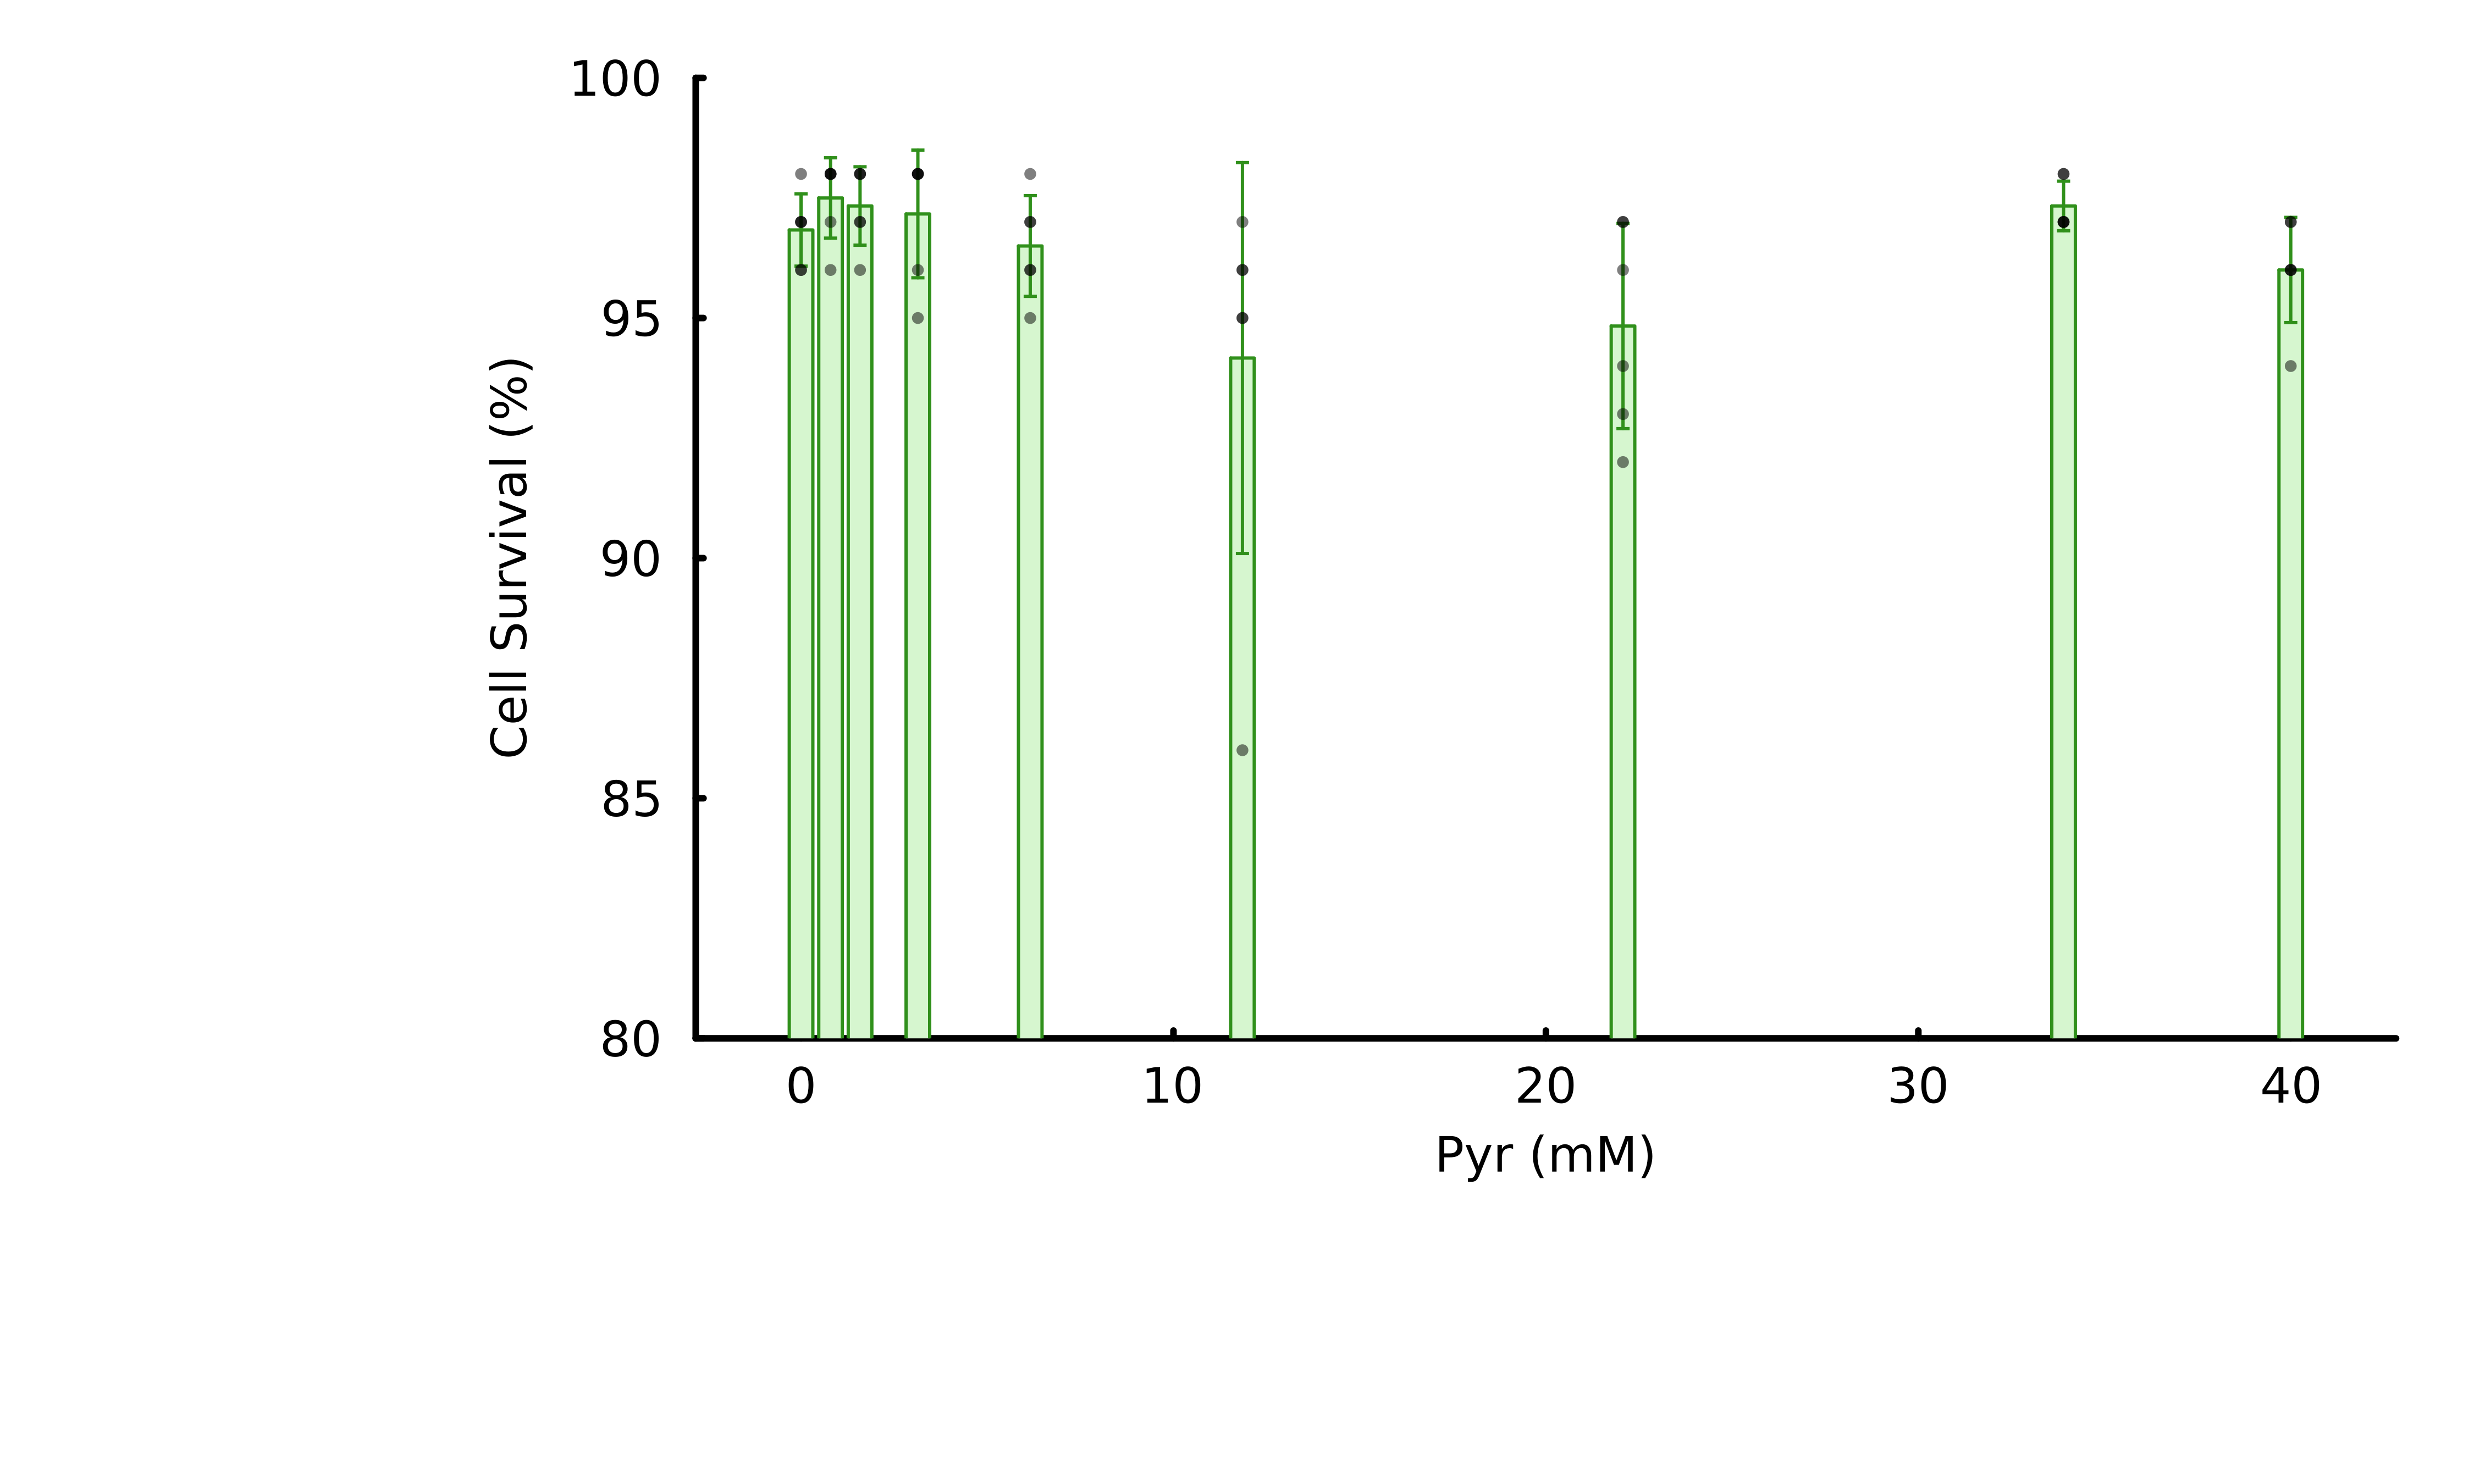

In [8]:
PP = bar(pyr, mean(hcat(rep1,rep2,rep3), dims = 2), yerror = std(hcat(rep1,rep2,rep3), dims = 2), xlabel = "Pyr (mM)", ylabel = "Cell Survival (%)", label = "", grid = false, markersize=round(5/5), markerstrokewidth=0.1, linewidth=0.5, size = (1500,900), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), colour = "#d6f6cfff", thickness_scaling = 4, dpi = 300,
markercolour = "#30901bff", linecolour = "#30901bff", ylim = (80,100))

scatter!(pyr, rep1, label = "", markersize=1, markerstrokewidth=0.1, colour = "black", alpha = 0.5)
scatter!(pyr, rep2, label = "", markersize=1, markerstrokewidth=0.1, colour = "black", alpha = 0.5)
scatter!(pyr, rep3, label = "", markersize=1, markerstrokewidth=0.1, colour = "black", alpha = 0.5)

# savefig(PP,"C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\SuppFig7Stuff\\SupplementaryFigure_CellViabilityCounter.svg")

display(PP)

# Alamar Blue Assay

In [9]:
dat = CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\PyrBuffer_ViabilityAssayCellCount\\aB_LMF_DGC_pyr_concentrations.csv", DataFrame)

Row,0,0.792,1.584,3.137,6.154,11.852,22.07,33.9,40,80
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,549978,525119,601226,475905,638028,522714,526633,558216,545394,545394
2,550712,505205,551808,470120,583595,602784,570481,582671,530649,530649
3,526952,528051,537545,488306,548459,587166,561113,561716,552404,552404


In [10]:
allDat = convert(Matrix, transpose(Matrix(dat)))

10×3 Matrix{Int64}:
 549978  550712  526952
 525119  505205  528051
 601226  551808  537545
 475905  470120  488306
 638028  583595  548459
 522714  602784  587166
 526633  570481  561113
 558216  582671  561716
 545394  530649  552404
 545394  530649  552404

In [11]:
pvtmp = pvalue(OneSampleTTest(vec(convert.(Float64, allDat[1,:])), vec(convert.(Float64, allDat[4,:]))))

0.038553288413762175

In [12]:
statdifs = zeros(9)
pVa = zeros(9,9)
for i in 1:9
    pvls = zeros(9);
    for j in 1:9
        pvls[j] = pvalue(OneSampleTTest(vec(convert.(Float64, allDat[i,:])), vec(convert.(Float64, allDat[j,:]))))
        pVa[i,j] = pvls[j]
    end
end

In [48]:
pVa.<0.01

9×9 BitMatrix:
 0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1
 0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  1  0  1  0  0  0  0  0

In [82]:
j=9

pvalue(OneSampleTTest(vec(convert.(Float64, allDat[4,:])), vec(convert.(Float64, allDat[j,:]))))

0.0016160176459853292

In [59]:
allDat

10×3 Matrix{Int64}:
 549978  550712  526952
 525119  505205  528051
 601226  551808  537545
 475905  470120  488306
 638028  583595  548459
 522714  602784  587166
 526633  570481  561113
 558216  582671  561716
 545394  530649  552404
 545394  530649  552404

In [123]:
# First one with none. 
# Second one with 4 and 9
# Third one with none
# Forth one with 2 and 9
# None
# None
# None
# None
# None
mm = 4
hcat(pVa[:,mm], pVa[:,mm].<0.01)

9×2 Matrix{Float64}:
   0.0385533   0.0
   0.00995552  1.0
   0.0606016   0.0
 NaN           0.0
   0.0627785   0.0
   0.065409    0.0
   0.0350705   0.0
   0.0170982   0.0
   0.00161602  1.0

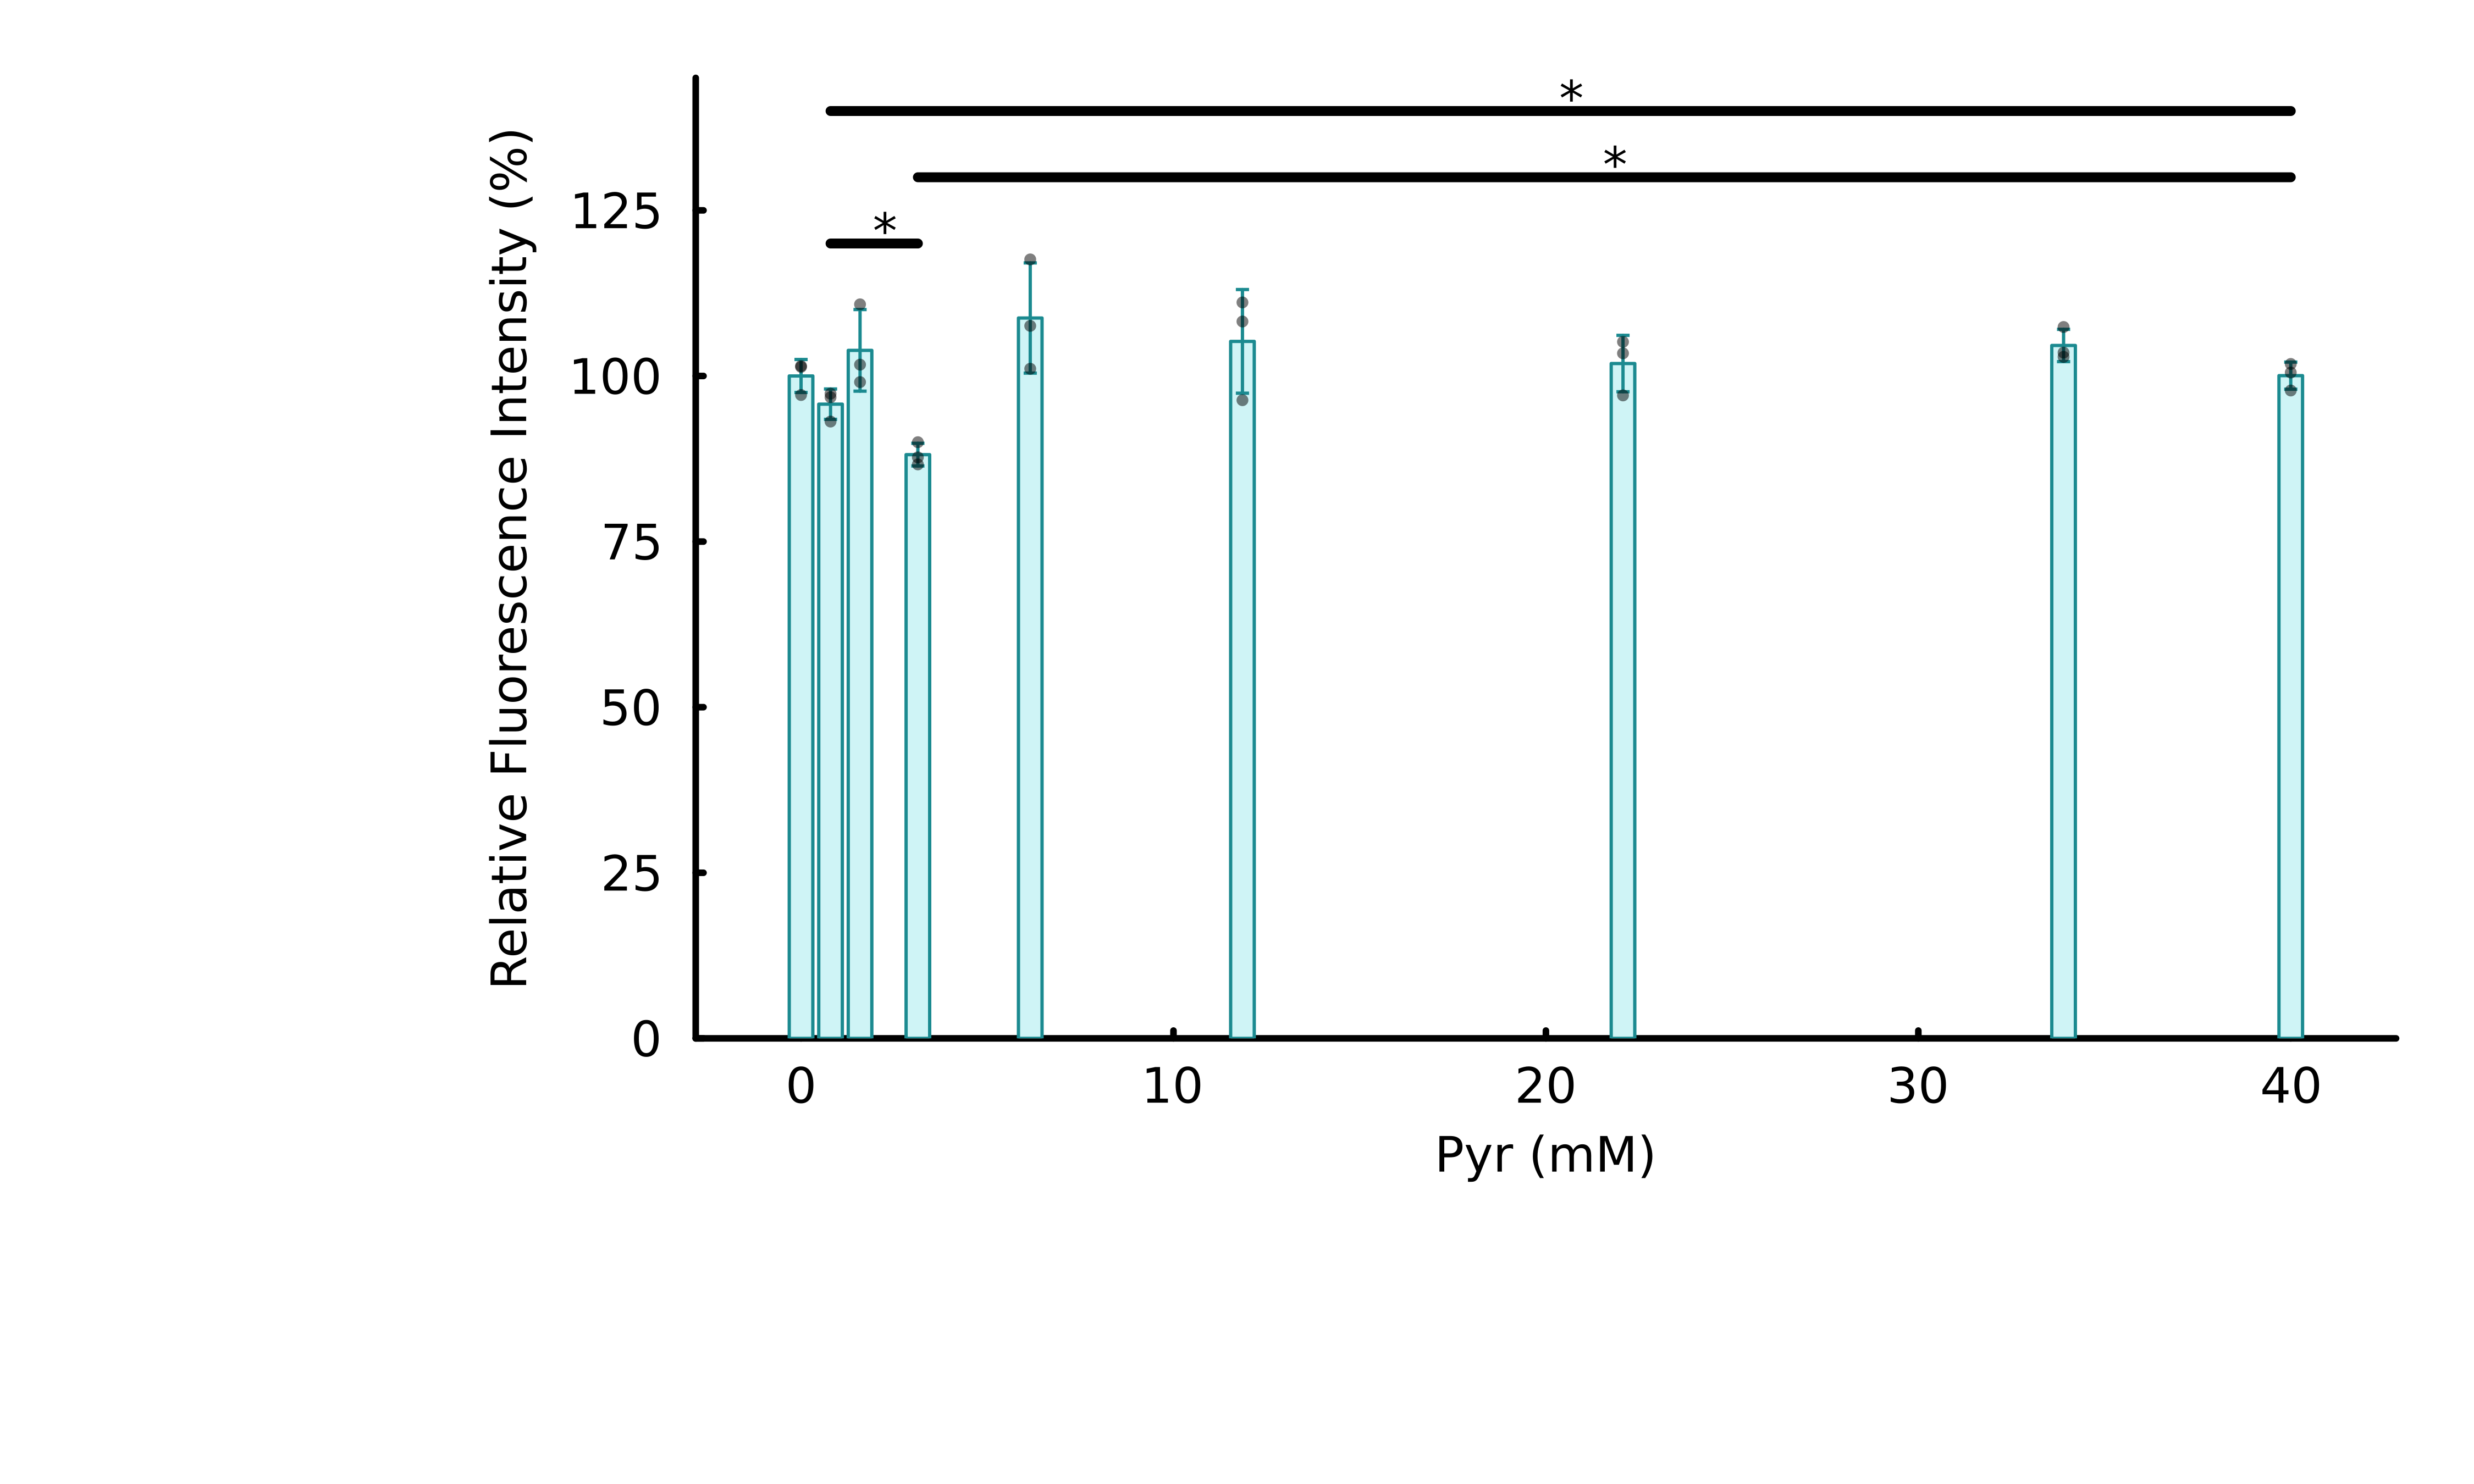

In [132]:
PP = bar(pyr, mean(allDat[1:9,:]./mean(allDat[1,:])*100, dims = 2), yerror = std(allDat[1:9,:]./mean(allDat[1,:])*100, dims = 2), xlabel = "Pyr (mM)", ylabel = "Relative Fluorescence Intensity (%)", label = "", grid = false, markersize=round(5/5), markerstrokewidth=0.1, linewidth=0.5, size = (1500,900), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), colour = "#cff4f6ff", thickness_scaling = 4, dpi = 300,
markercolour = "#1b8a90ff", linecolour = "#1b8a90ff", ylim = (0, 145))

scatter!(pyr, allDat[1:9,1]./mean(allDat[1,:])*100, label = "", markersize=1, markerstrokewidth=0.1, colour = "black", alpha = 0.5)
scatter!(pyr, allDat[1:9,2]./mean(allDat[1,:])*100, label = "", markersize=1, markerstrokewidth=0.1, colour = "black", alpha = 0.5)
scatter!(pyr, allDat[1:9,3]./mean(allDat[1,:])*100, label = "", markersize=1, markerstrokewidth=0.1, colour = "black", alpha = 0.5)

plot!([pyr[2], pyr[4]],[120, 120], label = "", colour = "black", linewidth = 1.5)
annotate!(mean([pyr[2], pyr[4]]), 122, text("*",  :black, :left, 5))

plot!([pyr[4], pyr[9]],[130, 130], label = "", colour = "black", linewidth = 1.5)
annotate!(mean([pyr[4], pyr[9]]), 132, text("*",  :black, :left, 5))

plot!([pyr[2], pyr[9]],[140, 140], label = "", colour = "black", linewidth = 1.5)
annotate!(mean([pyr[2], pyr[9]]), 142, text("*",  :black, :left, 5))

# annotate!(-2.8, 6.7, text("x 10"*L"^5",  :black, :left, 5))


savefig(PP,"C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\SuppFig7Stuff\\SupplementaryFigure_CellViabilityAnBlue.svg")

display(PP)